In [1]:
import numpy as np
from simulacion.utilidades import *
import yaml
from utilidades.graficar import draw_fotones_hist
def parse_param(valor):
    if isinstance(valor, str):
        valor = valor.replace("pi", "np.pi")
        return eval(valor, {"__builtins__": None, "np": np})
    return valor

In [2]:
config_path = "configs/experiments_espesor/config_espesor10.yaml"
with open(config_path, "r") as file:
    config = yaml.safe_load(file)

In [3]:
fuente, entorno, estructuras = setup_experiment(config)

config_emision_fuente = config["emision_fuente"]
config_emision_fuente["mean_angle"] = parse_param(config_emision_fuente["mean_angle"])
config_emision_fuente["std_angle"] = parse_param(config_emision_fuente["std_angle"])
config_emision_fuente["N_fotones"] = 1000

print(fuente)
print(entorno)
print(estructuras)

Fuente monocromática. Lambda: 532. Origen: 0. Entorno: Entorno 0 con Material con Índice de refracción complejo: 1.4 + 0.0i. Dispersion pos <function GenerateRandomUniformPosition2D at 0x7762a8275900>. Dispersion ang <function GenerateRandomUniformAngle at 0x7762a8275a20>.
Entorno 0 con Material con Índice de refracción complejo: 1.4 + 0.0i
[esfera(2,[   0 4000    0],2725,Índice de refracción complejo: 1.5986789640199812 + 0.00540740233383831i), esfera(1,[   0 4000    0],3000,Índice de refracción complejo: 2 + 0.0i)]


In [4]:
results = process_repetition(config_emision_fuente, estructuras, entorno, fuente, config_emision_fuente["d_ampliacion"])

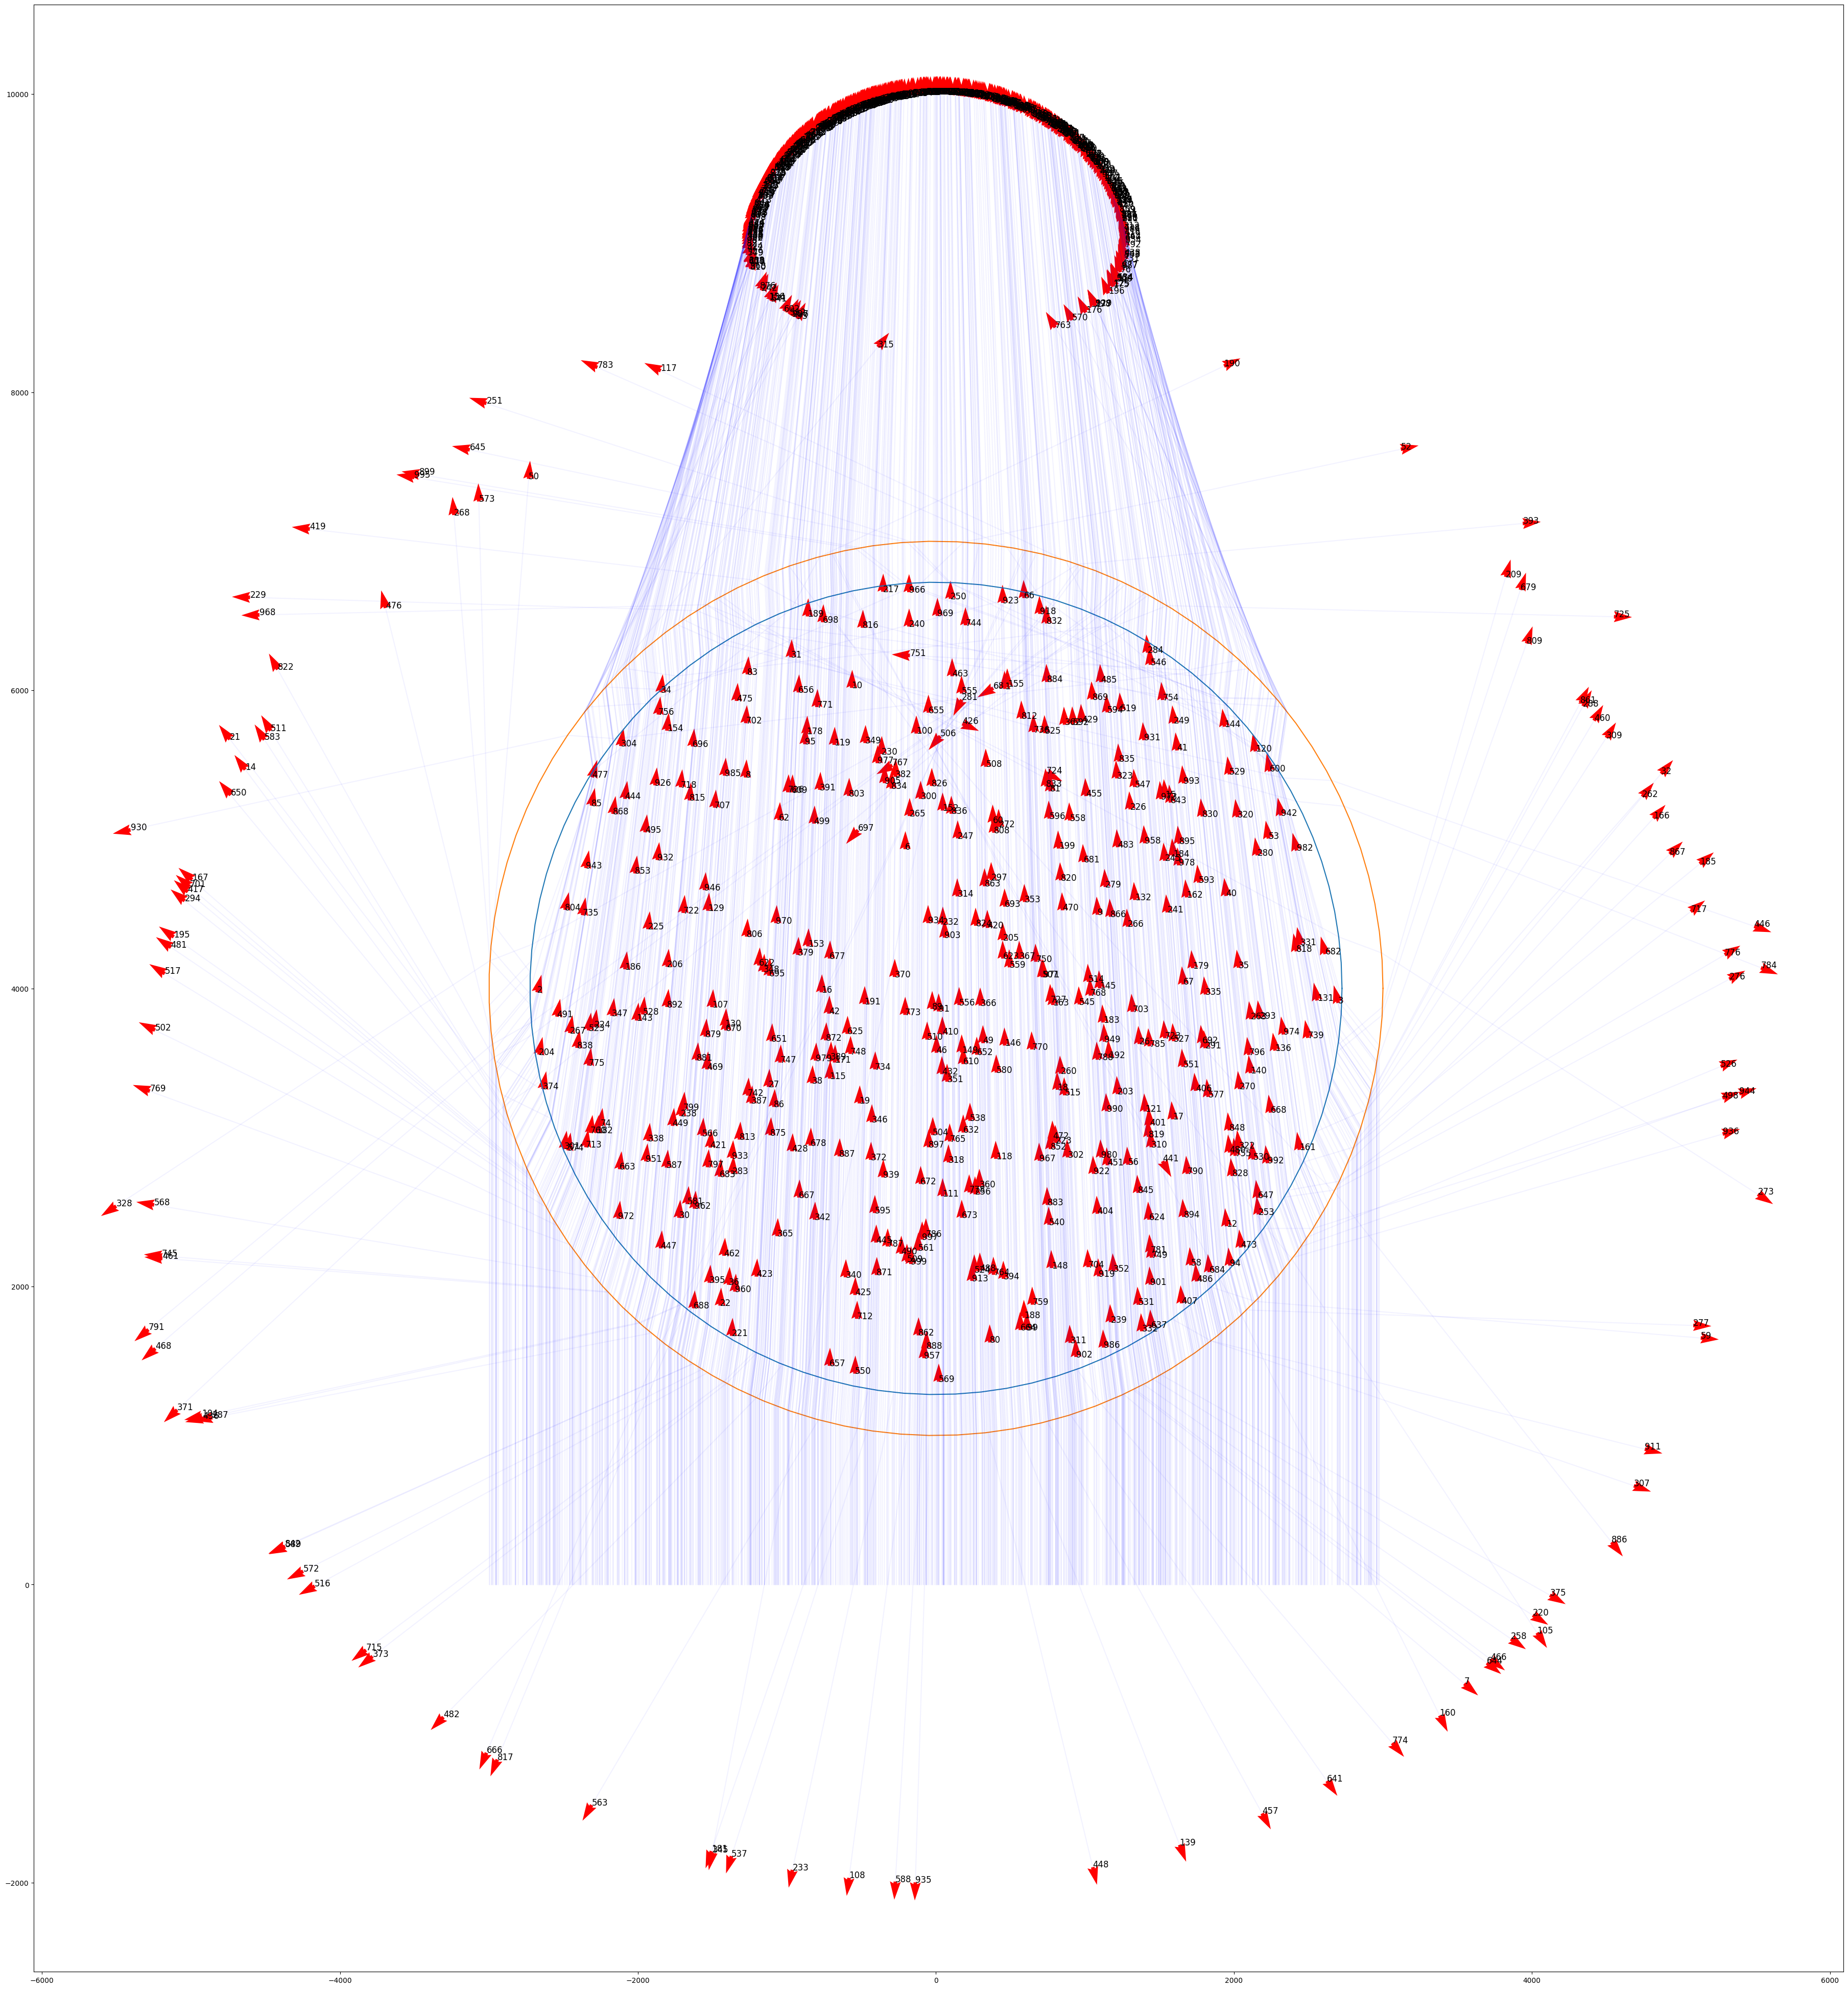

In [5]:
draw_fotones_hist(results["Fotones inactivos"], estructuras, expand = True)

66
[(array([757.30785613,   0.        ,   0.        ]), 0), (array([ 757.30785613, 1097.15918262,    0.        ]), 0), (array([ 735.62452985, 1376.17044169,    0.        ]), 1), (array([ 591.3867398 , 6619.26449168,    0.        ]), 2)]
[(array([6.123234e-17, 1.000000e+00, 0.000000e+00]), 'Emission'), (array([-0.07748125,  0.99699381,  0.        ]), 'refract'), (array([-0.02749965,  0.99962181,  0.        ]), 'refract'), (array([-0.02749965,  0.99962181,  0.        ]), 'absorb')]


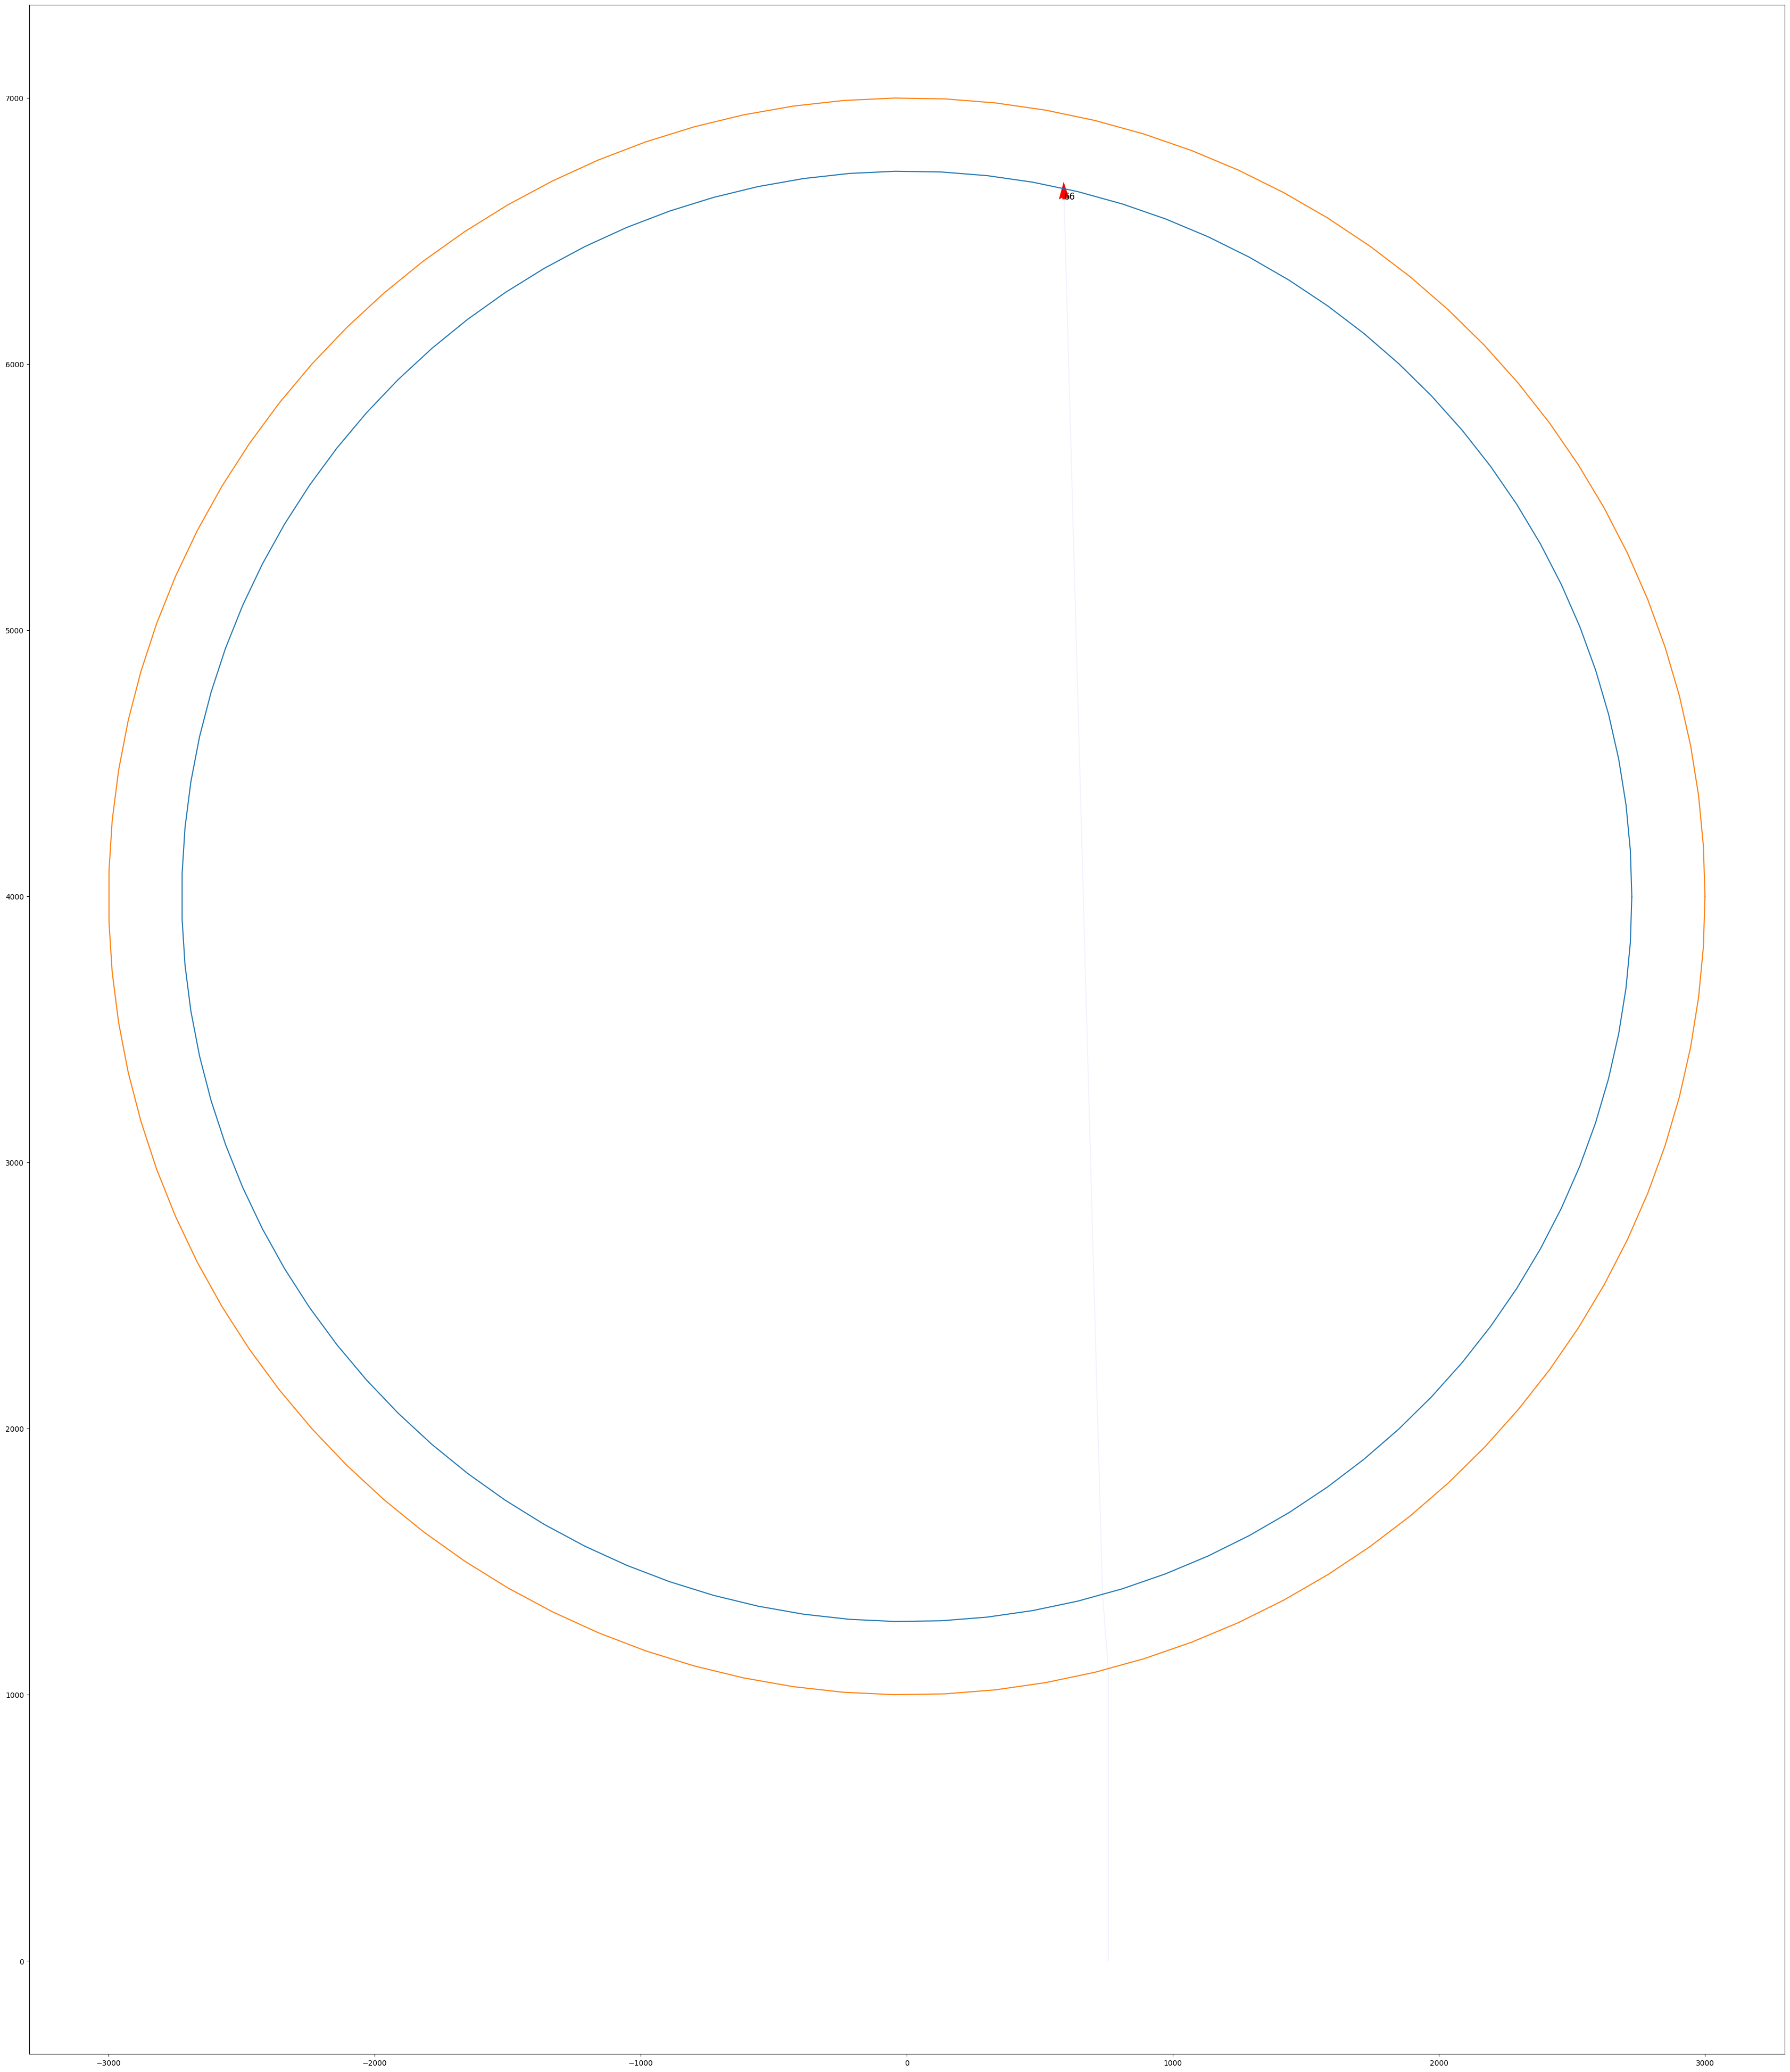

In [6]:
ide = 66
fotones_inactivos = results["Fotones inactivos"]
print(fotones_inactivos[ide-1].n)
print(fotones_inactivos[ide-1].poshist)
print(fotones_inactivos[ide-1].dirhist)
draw_fotones_hist([results["Fotones inactivos"][ide-1]], estructuras, expand = True)